In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# 범주형 수치형 인코딩 및 정규화 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

keras = tf.keras

In [3]:
import tensorflow as tf

from math import sqrt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

keras = tf.keras

In [4]:
# 한글 표기를 위한 처리

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [5]:
# 데이터 로드
df = pd.read_csv('../data/train.csv')
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [6]:
# df.iloc[:, 1]

In [7]:
cp_df = df.copy()

In [8]:
# 요일 범주형 > 라벨인코딩 처리
le = LabelEncoder()
le.fit(cp_df.iloc[:, 1])
cp_df['요일']=le.transform(cp_df.iloc[:, 1])

In [9]:
# df.head()

In [10]:
# 데이터 결측치 확인
# for col in df.columns:
#     print('column : {0} \t\t 결측치 : {1}'.format(col, df[col].isnull().sum()))

In [11]:
# 이상치 확인
# df[df.columns].boxplot(figsize=(20, 15)
#                                     , vert=False
#                                     , flierprops=dict(markerfacecolor='r', marker='s'))

In [12]:
# 품목별 가격
# df.iloc[:, 3::2].plot(figsize=(20, 30), subplots=True)

In [13]:
# # 품목별 거래량
# df.iloc[:, 2::1].plot(figsize=(20, 30), subplots=True)

In [14]:

# df.iloc[:,3::2].hist(figsize=(20, 30))

In [15]:
# 거래량
# df.iloc[:,2::1].hist(figsize=(20, 30))

In [16]:
cp_df.head(5)

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,5,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,3,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,6,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [17]:
# 데이터 MinMaxScaler정규화 
minmax = MinMaxScaler()
minmax.fit(cp_df.iloc[:, 1:])
cp_df.iloc[:, 1:]=minmax.transform(cp_df.iloc[:, 1:])
# robust = RobustScaler()
# robust.fit(df.iloc[:, 2:])
# df.iloc[:, 2:]=minmax.transform(df.iloc[:, 2:])

In [18]:
# baseline 기반으로 데이터 구분

In [19]:
# train set => date 를 제외 
input_col_list = cp_df.iloc[:, 1:].columns 

# ytrain set => date 요일 거래량을 제외 하고 가격 컬럼만 추출 
label_col_list = cp_df.iloc[:, 3::2].columns

In [20]:
# date index 로 설정
# cp_df.index = cp_df['date']
# cp_df.index.name = 'date'

In [21]:
# for col in input_col_list: 
#     if "가격" in col:
#         print(col)
#     else:
#         print(col)
    

In [22]:
# 이상치 확인
# cp_df.iloc[:,3::3].boxplot(figsize=(20, 15)
#                                     , vert=False
#                                     , flierprops=dict(markerfacecolor='r', marker='s'))

In [23]:
# 이상치 확인
# cp_df.iloc[:, ::2].boxplot(figsize=(20, 15)
#                                     , vert=False
#                                     , flierprops=dict(markerfacecolor='r', marker='s'))

In [24]:
# 이상치에 대한 처리 방안 ? 

In [25]:
print(cp_df.shape)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1733, 44)
label_col_list 21
input_col_list 43


In [26]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
# BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                        # 인코더 시퀀스 길이
# future_size = 7                        # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [27]:
# reframed = cp_df.shift(periods=7, axis=0)
# reframed.reset_index(drop=True, inplace=True)
# reframed.head(10)

In [28]:
cp_df.head(5)

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,2016-01-02,0.833333,0.015520,0.0658,0.020797,0.264706,0.024437,0.6405,0.000007,0.064389,...,0.060900,0.511068,0.000197,0.398376,0.023032,0.356152,0.000590,0.08056,0.0,0.0
2,2016-01-03,0.666667,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
3,2016-01-04,0.500000,0.273068,0.0956,0.440354,0.280882,0.460735,0.6175,0.001690,0.026130,...,0.457792,0.422302,0.227365,0.386475,0.745976,0.297728,0.001814,0.15540,0.0,0.0
4,2016-01-05,1.000000,0.224029,0.0884,0.368802,0.310294,0.416530,0.6065,0.002690,0.025416,...,0.387559,0.383287,0.067041,0.428410,0.278846,0.321334,0.005911,0.11412,0.0,0.0


In [ ]:
window_size = 14
future_size = 14

# 과거 28일의 변화를 보고 미래 28일을 예측
x_data = []
y_data = []


print("전처리 데이터 확인 : cp_df.shape:{0}\twindows_size:{1}\tfuture_size:{2}\ndata.shape[0]-window_size-future_size:{3}".format(cp_df.shape[0], window_size, future_size, cp_df.shape[0]-window_size-future_size))
for i in range(cp_df.shape[0]-window_size-future_size):
    print("="*50, "\ti cnt:", i)
    x = cp_df.iloc[i:i+window_size, 1:].to_numpy()
    # pprint(, width=20, indent=4)
    print("="*50, "x_data make size : ", i, i+window_size)
    y = cp_df.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy()
    # pprint(y, width=20, indent=4)
    print("="*50, "y_data make size : ", i+window_size, i+window_size, future_size)
    # y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
    # pprint(y_0, width=20, indent=4)
    print("="*50)
    x_data.append(x)
    # y_data.append(np.concatenate([y_0, y], axis=0))
    y_data.append(y)
    print("="*50)

In [30]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [31]:
x_data.shape, y_data.shape

((1705, 14, 43), (1705, 14, 21))

In [32]:
# pd.set_option('display.max_columns', 200)
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [33]:
# 데이터 세트 분할 
# 훈련, 검증, 테스트 데이터 세트 (70, 20, 10) 
# column_indices = {name: i for i, name in enumerate(reframed_df.columns)}
# print(column_indices)

NameError: name 'reframed_df' is not defined

In [43]:
n = len(x_data)
train_X = x_data[0:int(n*0.7)]
val_X = x_data[int(n*0.7):int(n*0.9)]
test_X = x_data[int(n*0.9):]

num_features = x_data.shape[2]

In [45]:
x_data.shape

((1705, 14, 43), 43)

In [46]:
n = len(y_data)
train_y = y_data[0:int(n*0.7)]
val_y = y_data[int(n*0.7):int(n*0.9)]
test_y = y_data[int(n*0.9):]

# num_features = y_data.shape[1]

In [47]:
# print(train_df.shape, val_df.shape, test_df.shape)
# print(num_features)

In [48]:
label_len = 21
features_len = 43
window_size = 14 # tiemstamp

In [49]:
len(train_df.columns)

NameError: name 'train_df' is not defined

In [51]:
# train_df.head(10)

In [52]:
# train_df.head(5)

# features_col_list = [col for col in train_df.columns if '_tg' not in col]
# # print(features_col_list)
# # print(len(features_col_list))
# label_col_list = [col for col in train_df.columns if '_tg' in col]
# # print(label_col_list)
# print(len(label_col_list))
# print(len(features_col_list))


In [ ]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                        # 인코더 시퀀스 길이
# future_size = 7                        # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [53]:
label_len = 21
features_len = 43
window_size = 14 # tiemstamp

In [54]:
# num_features
43*14

602

In [55]:
# 입력값과 출력값으로 분리
# train_X, train_y = train_df.iloc[:, :features_len*window_size], train_df.loc[:,label_col_list]
# val_X, val_y = val_df.iloc[:, :features_len*window_size], val_df.loc[:,label_col_list]
# test_X, test_y = test_df.iloc[:, :features_len*window_size], test_df.loc[:,label_col_list]

In [56]:
# train_X

In [57]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1193, 14, 43) (1193, 14, 21)
(341, 14, 43) (341, 14, 21)
(171, 14, 43) (171, 14, 21)


In [58]:
# 범위, 타임스탬프, 컬럼
# train_X = train_X.values.reshape((train_X.shape[0], window_size, features_len))
# val_X = val_X.values.reshape((val_X.shape[0], window_size, features_len))
# test_X = test_X.values.reshape((test_X.shape[0], window_size, features_len))


In [59]:
# print(train_y.shape[0])
# print(train_y.shape[1])


In [60]:
# train_y = train_y.values.reshape((train_y.shape[0], train_y.shape[1]))
# val_y = val_y.values.reshape((val_y.shape[0], val_y.shape[1]))
# test_y = test_y.values.reshape((test_y.shape[0], test_y.shape[1]))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [61]:
# train_y

In [62]:
print(train_X.shape, len(train_X), train_y.shape)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1193, 14, 43) 1193 (1193, 14, 21)
(1193, 14, 43) (1193, 14, 21) (171, 14, 43) (171, 14, 21)


In [63]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1193, 14, 43) (1193, 14, 21)
(341, 14, 43) (341, 14, 21)
(171, 14, 43) (171, 14, 21)


In [64]:
keras.backend.clear_session()
np.random.seed(1030)
tf.random.set_seed(1030)

In [160]:
# 하이퍼파라미터
# device = torch.device("cuda:0")         # GPU 사용

# 입력/출력 품목/품종의 수
features_n = 43                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 128                        # 배치사이즈
EPOCHS = 150                             # 총 eopochs
# teacher_forcing = False               # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
window_size = 14                        # 인코더 시퀀스 길이, CNN Input shape
future_size = 14                        # 디코더 시퀀스 길이
hidden_dim = 128                        # rnn 히든차원
save_path = f'./models/best_model.pt'   # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
lr_list = [1e-5, 1e-4, 1e-3] # 0.01 기준으로
learning_rate = 5e-4                    # 학습률 0.0005
# Loss(cost) 함수 손실 함수 파라미터

# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 32

In [161]:
# 모델 구성 
# conv_lstm_model = keras.Sequential([
#     keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
#                            strides=1, padding="causal", 
#                            activation="relu", 
#                            input_shape=[window_size, features_n]), 
#     keras.layers.LSTM(32, activation='tanh'),
#     keras.layers.LSTM(16, activation='relu'),
#     keras.layers.Dense(target_n),
# ])
# conv_lstm_model.summary()

In [162]:
# 모델 구성 
conv_lstm_model = keras.Sequential([
    keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                           strides=1, padding="causal", 
                           activation="relu", 
                           input_shape=[window_size, features_n]), 
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.Dense(target_n)
])
conv_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 14, 32)            6912      
_________________________________________________________________
lstm_2 (LSTM)                (None, 14, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 14, 32)            8320      
_________________________________________________________________
dense_1 (Dense)              (None, 14, 21)            693       
Total params: 24,245
Trainable params: 24,245
Non-trainable params: 0
_________________________________________________________________


In [163]:
# 옵티마이저 및 로스 함수 정의 
optimizer_func = keras.optimizers.Adam(learning_rate=learning_rate)
# loss_func = keras.losses.MeanAbsoluteError() # MAE 
loss_func = keras.losses.Huber() # Huber 사용 MAE, MSE 를 합친 outlier 의 영향을 덜 받음  

In [164]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss'
                              , patience=10
                              , mode='min')
# val_loss 기준 체크포인터 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = keras.callbacks.ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [165]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)

(1193, 14, 43) (1193, 14, 21)
(341, 14, 43) (341, 14, 21)


In [166]:
conv_lstm_model.compile(loss=loss_func,
                optimizer=optimizer_func,
                metrics=["mae"])

hist=conv_lstm_model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE
                         , validation_data=(val_X, val_y), callbacks=[earlystopping]
                         , verbose=2, shuffle=False)

Epoch 1/150
10/10 - 1s - loss: 0.0552 - mae: 0.2638 - val_loss: 0.0463 - val_mae: 0.2459
Epoch 2/150
10/10 - 0s - loss: 0.0419 - mae: 0.2282 - val_loss: 0.0363 - val_mae: 0.2123
Epoch 3/150
10/10 - 0s - loss: 0.0327 - mae: 0.1992 - val_loss: 0.0304 - val_mae: 0.1950
Epoch 4/150
10/10 - 0s - loss: 0.0273 - mae: 0.1814 - val_loss: 0.0265 - val_mae: 0.1805
Epoch 5/150
10/10 - 0s - loss: 0.0238 - mae: 0.1659 - val_loss: 0.0242 - val_mae: 0.1683
Epoch 6/150
10/10 - 0s - loss: 0.0216 - mae: 0.1543 - val_loss: 0.0226 - val_mae: 0.1602
Epoch 7/150
10/10 - 0s - loss: 0.0203 - mae: 0.1475 - val_loss: 0.0217 - val_mae: 0.1554
Epoch 8/150
10/10 - 0s - loss: 0.0194 - mae: 0.1435 - val_loss: 0.0209 - val_mae: 0.1520
Epoch 9/150
10/10 - 0s - loss: 0.0187 - mae: 0.1408 - val_loss: 0.0203 - val_mae: 0.1494
Epoch 10/150
10/10 - 0s - loss: 0.0181 - mae: 0.1384 - val_loss: 0.0198 - val_mae: 0.1473
Epoch 11/150
10/10 - 0s - loss: 0.0175 - mae: 0.1362 - val_loss: 0.0193 - val_mae: 0.1457
Epoch 12/150
10/10 

In [ ]:
# 저장한 데이터를 로드
# conv_lstm_model.load_weights(filename)

In [168]:
pred = conv_lstm_model.predict(test_X)
yhat = pred.reshape(pred.shape[0]*pred.shape[1], pred.shape[2])

In [118]:
pred.shape

(171, 14, 21)

In [152]:
# test_y.shape
testy_df=pd.DataFrame(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))

In [151]:
# np.asarray(test_y)[20:]
yhat_df=pd.DataFrame(yhat)

In [155]:
# yhat_df

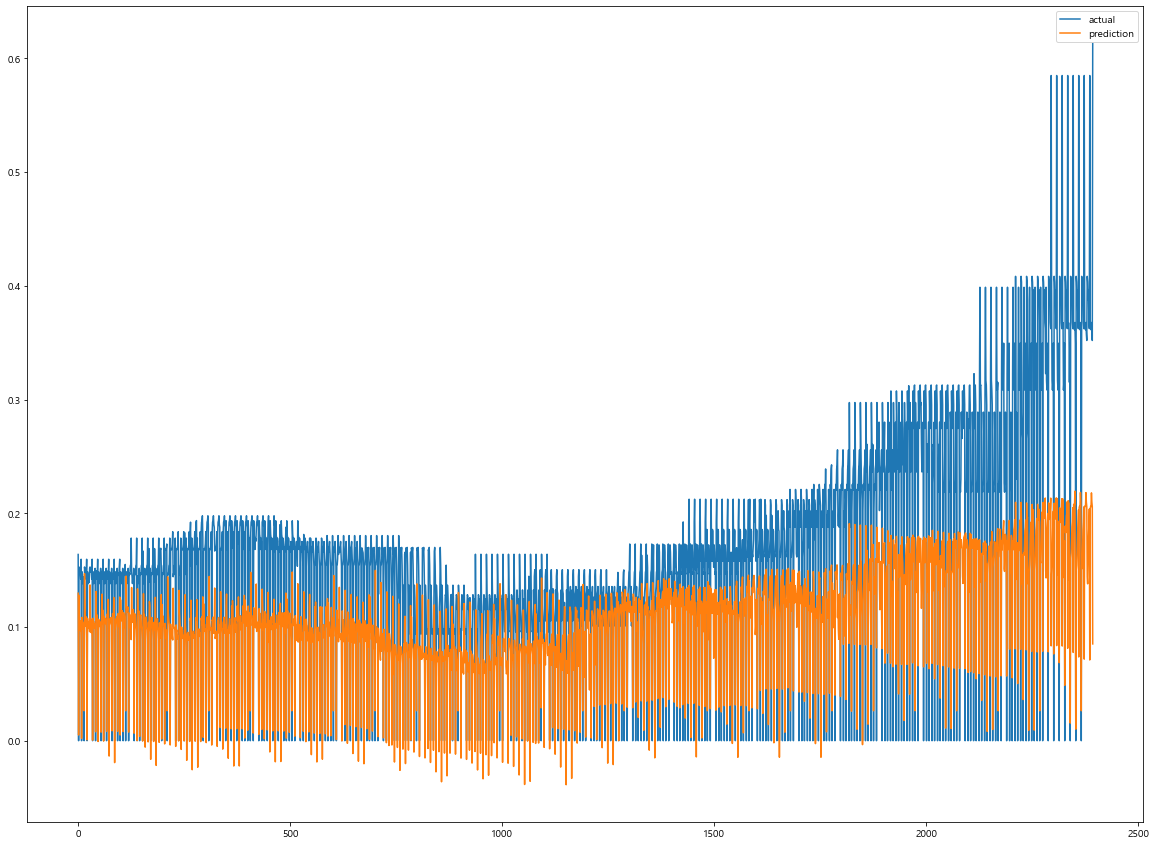

In [169]:
# 예측 데이터 시각화 
plt.figure(figsize=(20, 15))
# plt.plot(np.asarray(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2]))[14:, 0], label='actual')
# plt.plot(yhat[:, 0], label='prediction')
plt.plot(testy_df.iloc[:, 0], label='actual')
plt.plot(yhat_df.iloc[:, 0], label='prediction')
plt.legend()
plt.show()

In [170]:
#  검증 데이터로 예측모델 평가
val_evaluate = conv_lstm_model.evaluate(val_X, val_y, verbose=2)

#  테스트 데이터로 예측모델 평가
test_evaluate = conv_lstm_model.evaluate(test_X, test_y, verbose=2)
print("검증 데이터로 예측모델 평가: ", val_evaluate)
print("테스트 데이터로 예측모델 평가", test_evaluate)

# r2 score value 
yhat = conv_lstm_model.predict(test_X)
print(yhat.shape)

11/11 - 0s - loss: 0.0103 - mae: 0.0996
6/6 - 0s - loss: 0.0090 - mae: 0.0916
검증 데이터로 예측모델 평가:  [0.010302512906491756, 0.09957059472799301]
테스트 데이터로 예측모델 평가 [0.009018936194479465, 0.09161344170570374]
(171, 14, 21)


In [114]:
# test_y.shape
# test_y.shape
# test_y[170:][0][13]
# yhat.shape
# from sklearn.metrics import accuracy_score
# accuracy_score(test_y[170:][0][13], yhat[170:][0][13])
# test_y.reshape(171*14, 21)

In [171]:
# yhat=yhat.reshape(yhat.shape[0])
print("r2 score :", r2_score(test_y.reshape(test_y.shape[0]*test_y.shape[1], test_y.shape[2])[13:]
                             , yhat.reshape(yhat.shape[0]*yhat.shape[1], yhat.shape[2])[13:]))

r2 score : 0.4299225618545176


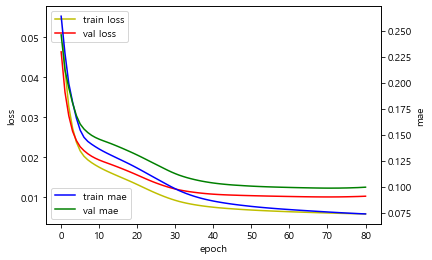

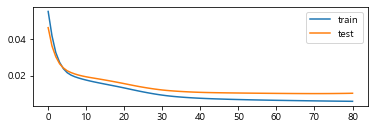

In [172]:
# 예측모델 평가 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['mae'], 'b', label='train mae')
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
pyplot.show()

plt.subplot(2, 1 , 1)
# plot history
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# so_score = so_model.evaluate(so_test_X, so_test_y)
# print(so_score)
